In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [3]:
# 한글 폰트 깨지지 않게 하기
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

### 데이터 불러오기 및 결측치 확인, 처리

In [5]:
df = pd.read_csv("../../01.files/02.Bigsata_analysis/보험료.csv", encoding = 'euc-kr')
df.head()

,고객번호,성별,나이,BMI,자녀수,흡연여부,가입유형,납부유형,보장범위,납입기간,보험료
0,ID100001,남성,19,27.9,0,1,홈쇼핑,은행,19,40,168849
1,ID100002,여성,18,33.8,1,0,인터넷,은행,10,40,17255
2,ID100003,여성,28,33.0,3,0,상담사,카드,12,30,44494
3,ID100004,여성,33,22.7,0,0,홈쇼핑,지로,15,30,219844
4,ID100005,여성,32,28.9,0,0,인터넷,카드,9,30,38668


In [6]:
''' 
BMI, 자녀수, 보장범위의 경우, 평균과 max값을 비교하였을 때 이상치처럼 보이는 값들이 있으나 
충분히 있을 수 있는 값이라 생각하므로 이상치 처리를 생략함.
'''

df.describe()

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료
count,1343.00000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,39.18615,30.666493,1.093075,0.204765,11.574832,28.220402,132549.094564
std,14.07208,6.091088,1.205849,0.403680,2.532388,6.094558,121072.475861
min,18.00000,16.000000,0.000000,0.000000,8.000000,20.000000,11218.000000
25%,26.00000,26.300000,0.000000,0.000000,10.000000,20.000000,47196.000000
50%,39.00000,30.400000,1.000000,0.000000,11.000000,30.000000,93779.000000
75%,51.00000,34.700000,2.000000,0.000000,12.000000,30.000000,166220.500000
max,64.00000,53.100000,5.000000,1.000000,20.000000,40.000000,637704.000000


In [7]:
'''
결측치가 총 5개 존재하나, 크지 않고, 현재로써는 알 수 있는 방법이 없으므로
결측치가 존재하는 행을 제거하기로 결정함
'''

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    1343 non-null   object 
 1   성별      1343 non-null   object 
 2   나이      1343 non-null   int64  
 3   BMI     1343 non-null   float64
 4   자녀수     1343 non-null   int64  
 5   흡연여부    1343 non-null   int64  
 6   가입유형    1341 non-null   object 
 7   납부유형    1340 non-null   object 
 8   보장범위    1343 non-null   int64  
 9   납입기간    1343 non-null   int64  
 10  보험료     1343 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 115.5+ KB


고객번호    0
성별      0
나이      0
BMI     0
자녀수     0
흡연여부    0
가입유형    2
납부유형    3
보장범위    0
납입기간    0
보험료     0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
'''
고객번호는 각 고객이 가지고 있는 고유한 값이므로, 변수로써 사용할 수 없기 때문에 제거
'''

df = df.drop(['고객번호'], axis = 1)
df = pd.get_dummies(df, drop_first = True)
df

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성,가입유형_인터넷,가입유형_홈쇼핑,납부유형_지로,납부유형_카드
0,19,27.9,0,1,19,40,168849,0,0,1,0,0
1,18,33.8,1,0,10,40,17255,1,1,0,0,0
2,28,33.0,3,0,12,30,44494,1,0,0,0,1
3,33,22.7,0,0,15,30,219844,1,0,1,1,0
4,32,28.9,0,0,9,30,38668,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,10,20,106005,1,0,1,1,0
1335,18,36.9,0,0,9,40,16298,0,1,0,0,0
1337,61,29.1,0,1,12,20,291413,0,0,1,0,1
1338,50,31.0,3,0,10,20,106005,1,0,1,1,0


In [10]:
df.isnull().sum()

나이          0
BMI         0
자녀수         0
흡연여부        0
보장범위        0
납입기간        0
보험료         0
성별_여성       0
가입유형_인터넷    0
가입유형_홈쇼핑    0
납부유형_지로     0
납부유형_카드     0
dtype: int64

### 변수간 경향성 파악

In [11]:
column_list = df.columns.tolist()
column_list.remove('보험료')

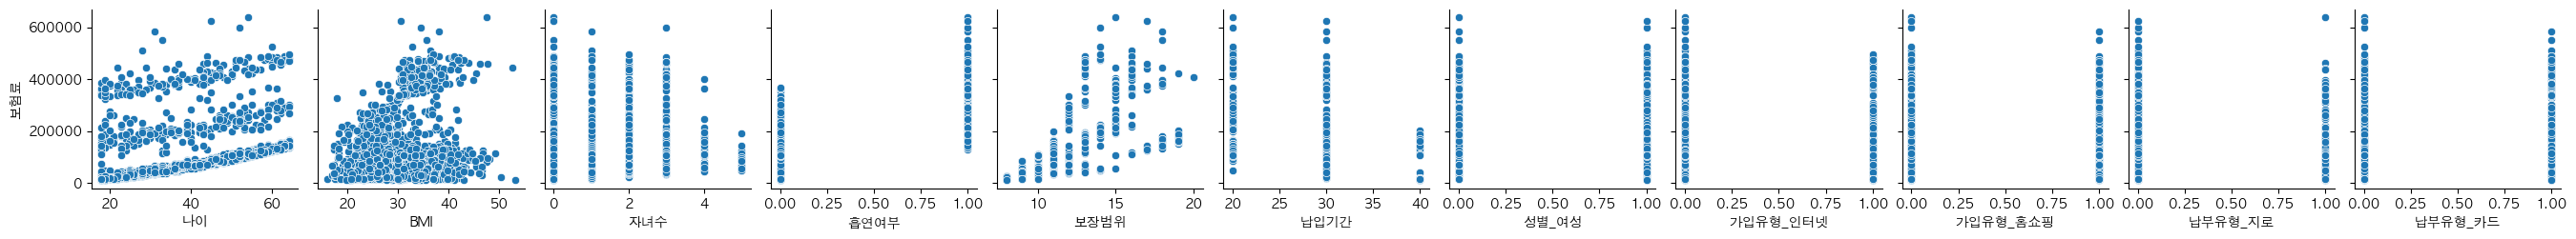

In [12]:
'''
보험료와 각 변수의 관련성을 봤을 때 
보험료를 기준으로 흡연 여부, 보장범위, 나이가 상관계수가 높았으며, 보장범위와 나이읙 그래프를 보았을 때 
양의 선형관계를 보이는 것을 알 수 있다. 
이외 범주형 변수의 경우 흡연 여부만 선형관계로 보이며, 나머지는 공통적으로 고르게 분배된 것을 확인할 수 있다. 
'''

sns.pairplot(df, y_vars = '보험료', x_vars = column_list)

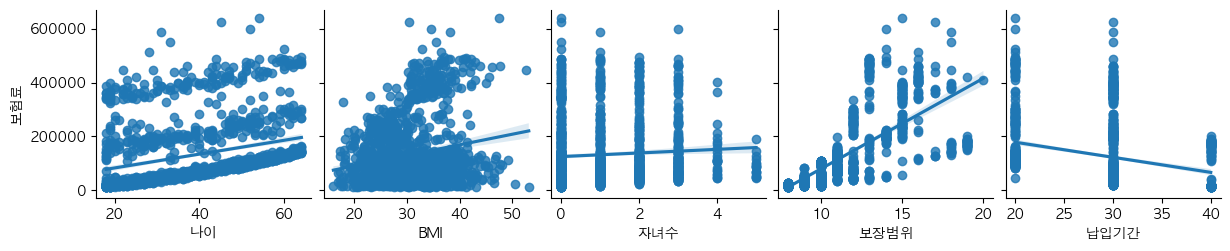

In [13]:
sns.pairplot(df, y_vars = '보험료', x_vars = ['나이', 'BMI', '자녀수', '보장범위', '납입기간'], kind = 'reg')

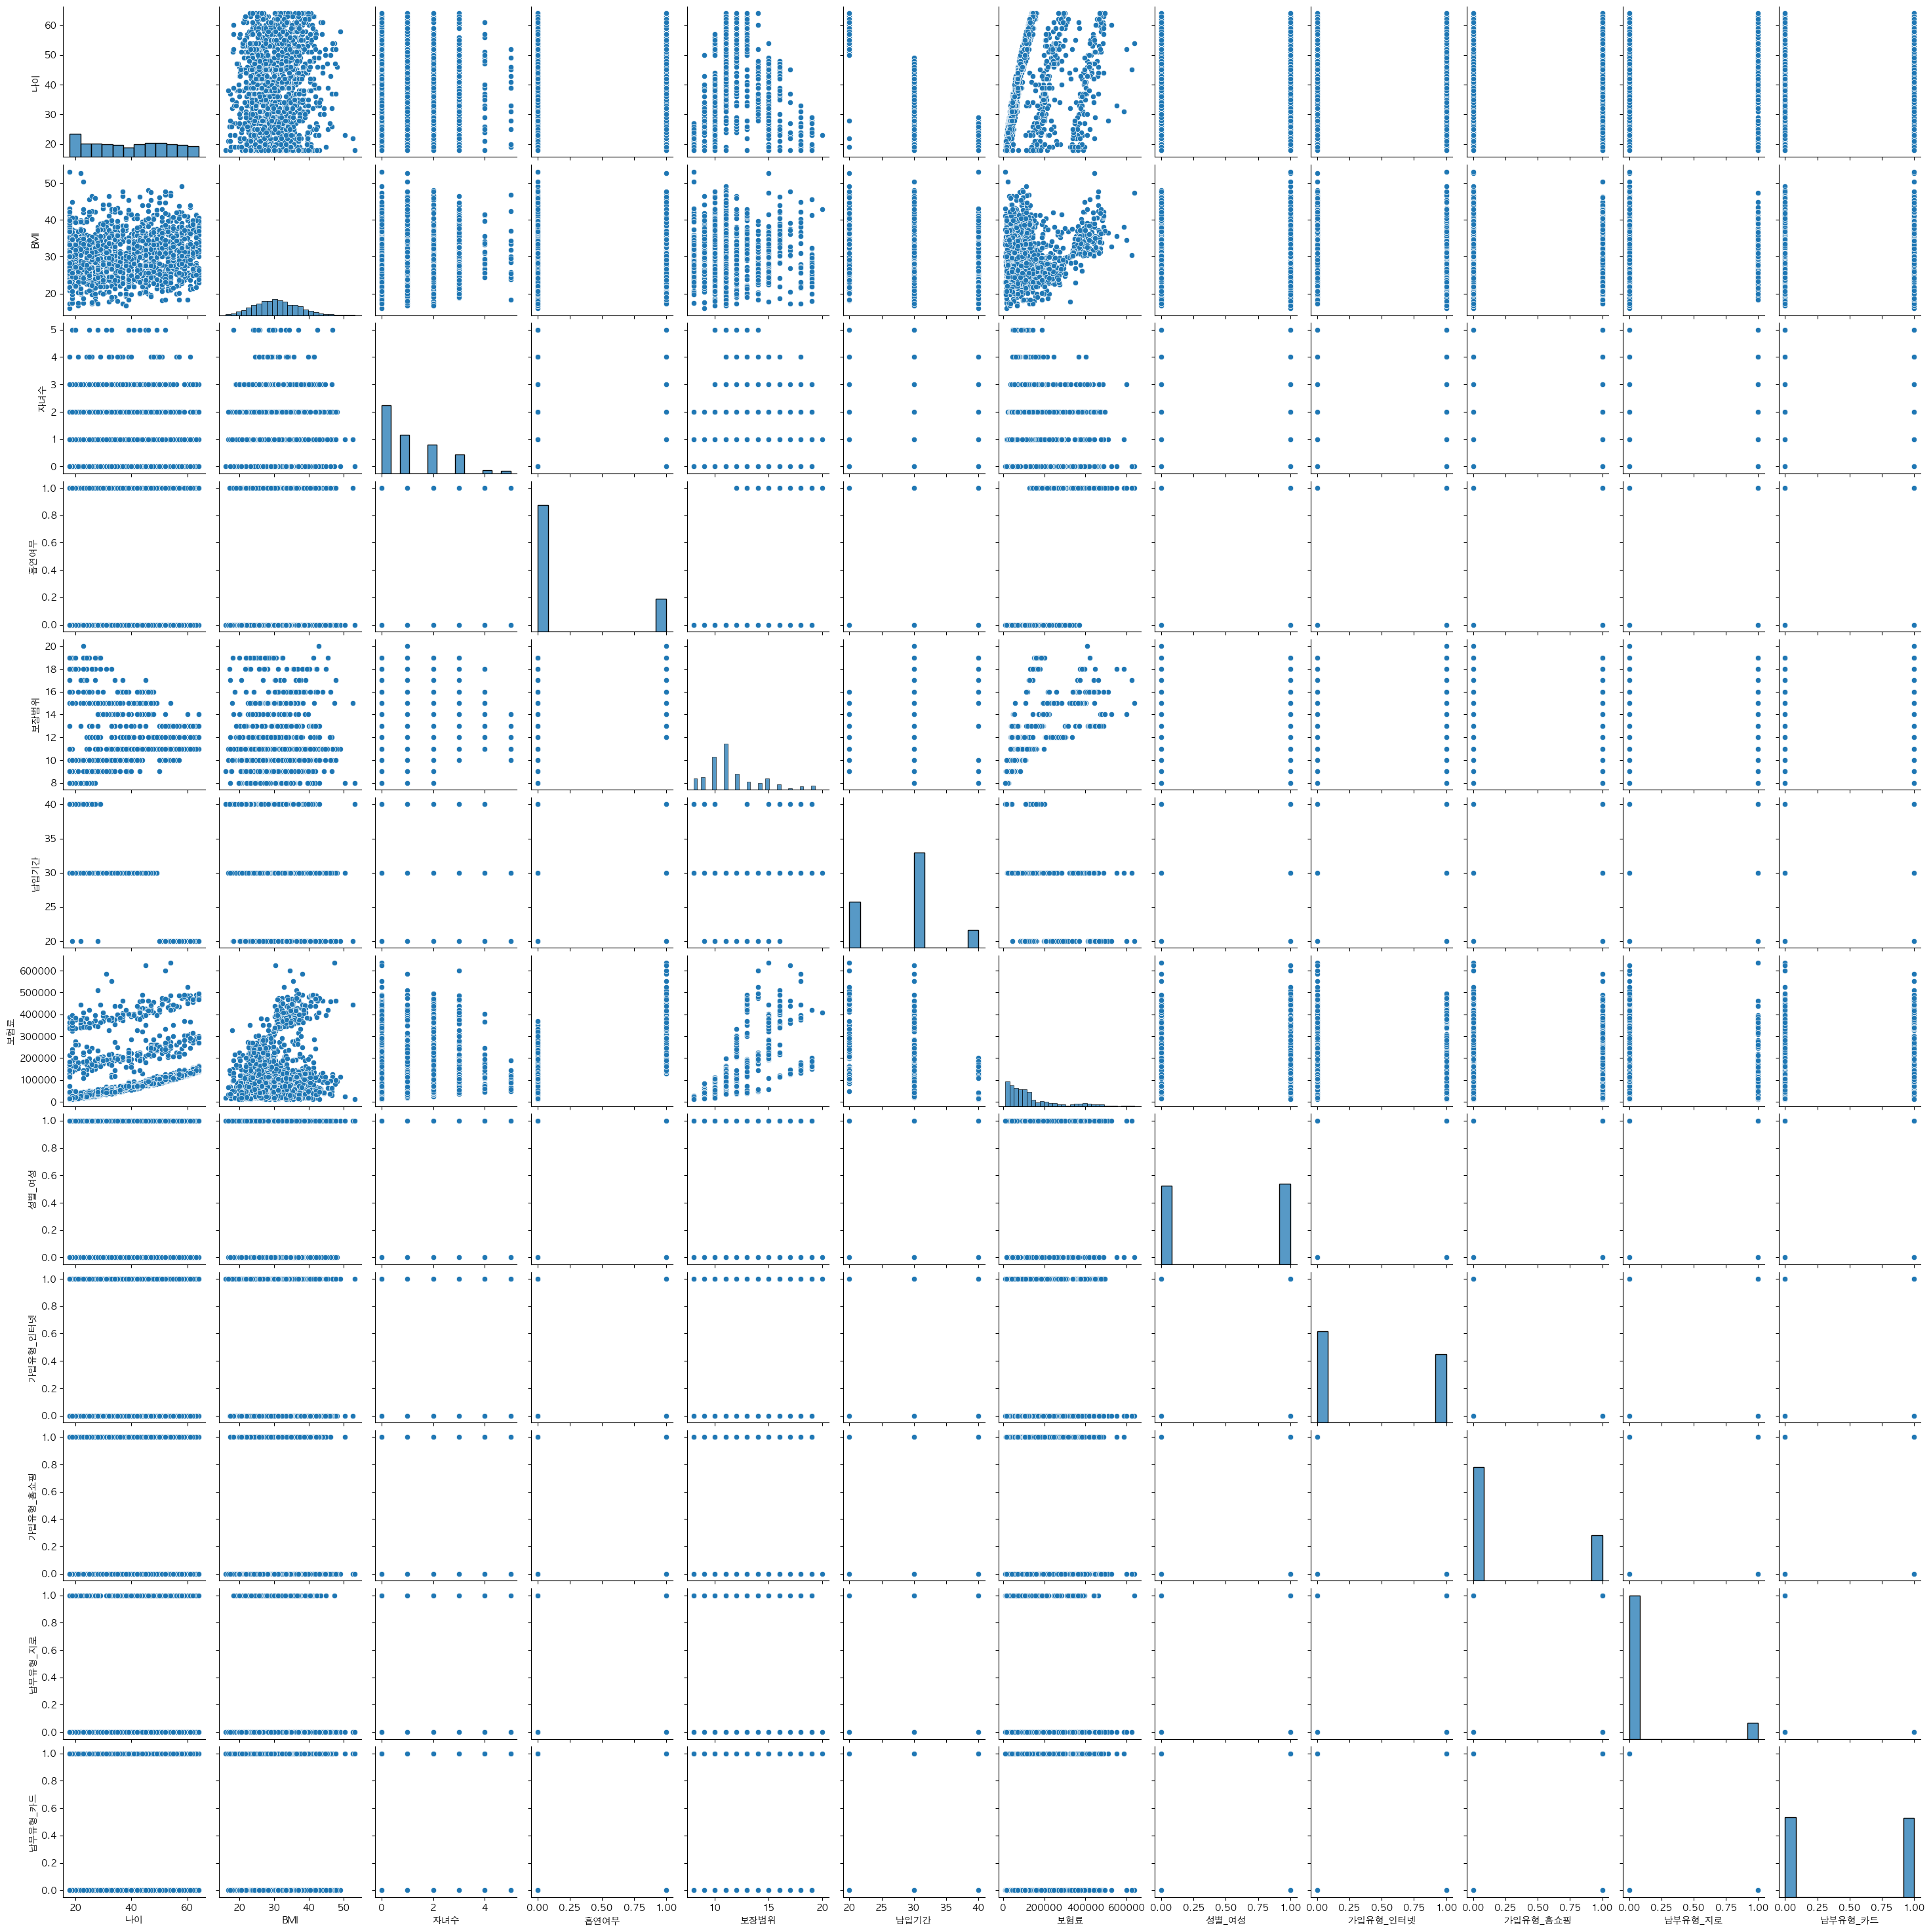

In [14]:
sns.pairplot(df)

In [15]:
df.corr().round(3)

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성,가입유형_인터넷,가입유형_홈쇼핑,납부유형_지로,납부유형_카드
나이,1.000,0.108,0.042,-0.026,-0.025,-0.827,0.298,-0.021,-0.016,-0.023,-0.004,-0.022
BMI,0.108,1.000,0.012,0.003,0.014,-0.139,0.197,0.045,-0.020,-0.026,0.017,0.001
자녀수,0.042,0.012,1.000,0.007,0.185,-0.040,0.067,0.018,-0.011,-0.029,-0.027,0.024
흡연여부,-0.026,0.003,0.007,1.000,0.702,0.048,0.787,0.075,-0.084,0.055,0.002,-0.002
보장범위,-0.025,0.014,0.185,0.702,1.000,0.146,0.703,-0.009,-0.090,0.061,0.024,0.003
납입기간,-0.827,-0.139,-0.040,0.048,0.146,1.000,-0.281,0.055,0.027,0.009,0.012,0.004
보험료,0.298,0.197,0.067,0.787,0.703,-0.281,1.000,0.056,-0.095,0.044,0.014,0.001
성별_여성,-0.021,0.045,0.018,0.075,-0.009,0.055,0.056,1.000,0.015,-0.027,-0.006,0.037
가입유형_인터넷,-0.016,-0.020,-0.011,-0.084,-0.090,0.027,-0.095,0.015,1.000,-0.549,-0.004,-0.002
가입유형_홈쇼핑,-0.023,-0.026,-0.029,0.055,0.061,0.009,0.044,-0.027,-0.549,1.000,0.111,-0.064


### 회귀모델 생성

In [16]:
# formula 텍스트 만드는 함수

def make_formula_txt(column_list, y_value):
    y_index = column_list.index(y_value)
    formula_text = column_list[y_index] + " ~ "
    x_list = column_list.copy()
    x_list.remove(y_value)
    #print(x_list)
    for i in range(1, len(x_list)):
        formula_text += x_list[i] + "+"
    formula_text = formula_text[:-1]
    formula_text
    
    return formula_text

In [17]:
# 모델 실행 코드

def run_ols(column_list, y_value, data):
    formula_text = make_formula_txt(column_list, y_value)

    reg_model = smf.ols(formula = formula_text, data = data)
    reg_result = reg_model.fit()
    print(reg_result.summary())
    
    return reg_result

In [31]:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 777) # 7:3
print(f"train data size: {df_train.shape}")
print(f"test data size: {df_test.shape}")

train data size: (936, 12)
test data size: (402, 12)


In [32]:
column_list = df_train.columns.tolist()
column_list

['나이',
 'BMI',
 '자녀수',
 '흡연여부',
 '보장범위',
 '납입기간',
 '보험료',
 '성별_여성',
 '가입유형_인터넷',
 '가입유형_홈쇼핑',
 '납부유형_지로',
 '납부유형_카드']

#### p-value가 0.05 이상인 변수중 가장 높은 p-value를 가진 변수부터 제거 후 재실행

In [33]:
run_ols(column_list, '보험료', df_train)

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     424.9
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:19:26   Log-Likelihood:                -11472.
No. Observations:                 936   AIC:                         2.297e+04
Df Residuals:                     925   BIC:                         2.302e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3406.1098   1.55e+04     -0.220      0.8

In [34]:
column_list.remove('가입유형_홈쇼핑')

In [35]:
run_ols(column_list, '보험료', df_train)

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     472.6
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:19:26   Log-Likelihood:                -11472.
No. Observations:                 936   AIC:                         2.296e+04
Df Residuals:                     926   BIC:                         2.301e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3660.3096   1.53e+04     -0.239      0.8

In [36]:
column_list.remove('납부유형_카드')

In [37]:
run_ols(column_list, '보험료', df_train)

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     532.3
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:19:29   Log-Likelihood:                -11472.
No. Observations:                 936   AIC:                         2.296e+04
Df Residuals:                     927   BIC:                         2.301e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3304.3593   1.52e+04     -0.217      0.8

In [38]:
column_list.remove('가입유형_인터넷')

In [39]:
run_ols(column_list, '보험료', df_train)

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     608.8
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:19:30   Log-Likelihood:                -11472.
No. Observations:                 936   AIC:                         2.296e+04
Df Residuals:                     928   BIC:                         2.300e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4216.1344   1.51e+04     -0.279      0.7

In [40]:
column_list.remove('납부유형_지로')

In [41]:
run_ols(column_list, '보험료', df_train)

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     710.3
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:19:32   Log-Likelihood:                -11472.
No. Observations:                 936   AIC:                         2.296e+04
Df Residuals:                     929   BIC:                         2.299e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4350.0790   1.51e+04     -0.288      0.7

In [42]:
column_list.remove('자녀수')

In [43]:
run_ols(column_list, '보험료', df_train)

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     850.8
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:19:35   Log-Likelihood:                -11473.
No. Observations:                 936   AIC:                         2.296e+04
Df Residuals:                     930   BIC:                         2.299e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3452.7016   1.51e+04     -0.229      0.8

#### 가입여부, 납부유형, 자녀수 변수가 제거된 것을 확인, 확정된 변수를 가지고 다시 실행

In [46]:
reg_result = run_ols(column_list, '보험료', df_train)

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     850.8
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:20:04   Log-Likelihood:                -11473.
No. Observations:                 936   AIC:                         2.296e+04
Df Residuals:                     930   BIC:                         2.299e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3452.7016   1.51e+04     -0.229      0.8

In [47]:
'''
VIF를 확인하였을때, 10 이상인 변수가 없는 것으로 보아, 각각의 변수별 다중공선성이 낮은 것을 확인할 수 있음
'''

df_train_x = df_train[column_list[1:]]
df_train_c_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_c_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_c_const.values, i) for i in range(df_train_c_const.shape[1])]

df_vif.sort_values('VIF', inplace = True)
df_vif.round(2)

,variable,VIF
6,성별_여성,1.04
1,BMI,1.14
4,납입기간,1.73
3,보장범위,2.79
2,흡연여부,3.69
5,보험료,5.57
0,const,81.70


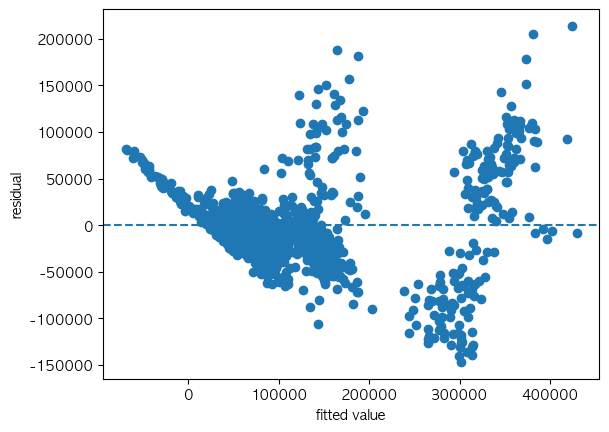

In [48]:
'''
등분산성 검정의 경우 분포의 유형이 두가지로 나타나는 것이 확인되며, 등분산성을 만족하지 못하는 것을 확인할 수 있음
이는 보험료(y값)의 스케일이 다른 변수에 비해 과하게 커서 나타나는 현상으로 추측되며
아래에서 y값에 Log를 취해 스케일 조정 후 다시 학습한 결과를 첨부해둠
'''

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

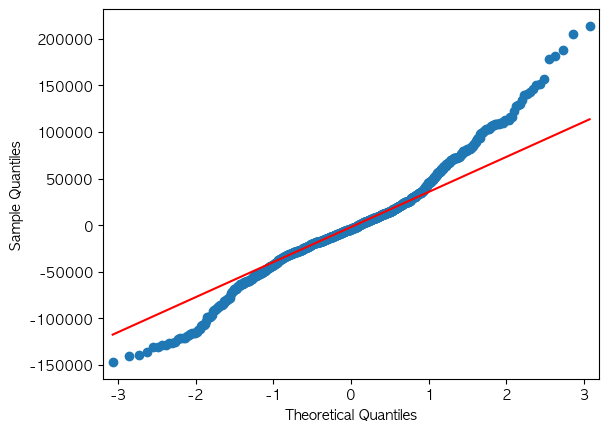

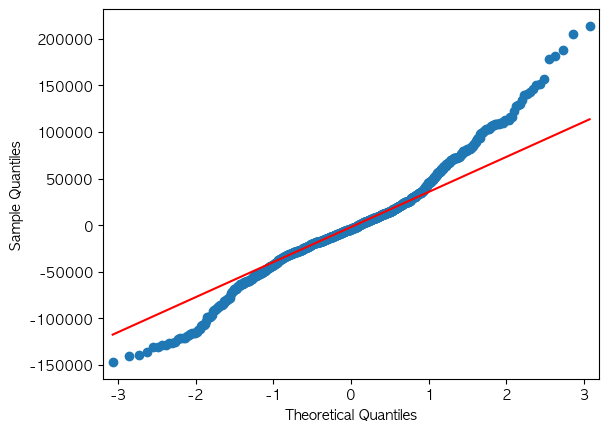

In [49]:
'''
정규분포 직선을 중심으로 분포가 따라가는 것을 확인할 수 있으며, 정규분포를 따르는 것이 확인됨
'''

qqplot(reg_result.resid, line = 'q')

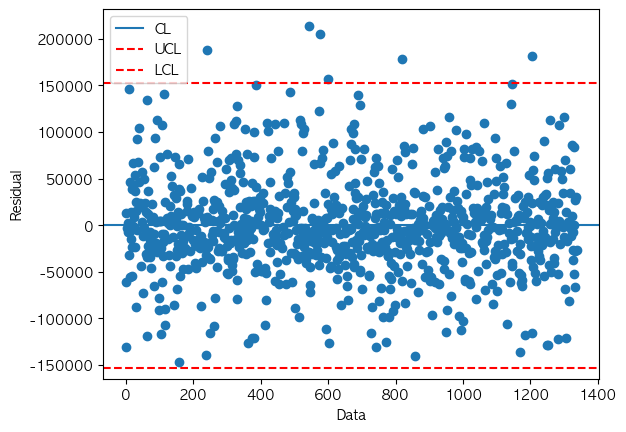

In [50]:
'''
관리상하한을 벗어나는 데이터가 몇가지 존재하나, 이는 각 변수에 있는 특수한 값(보장범위, BMI)때문에 
그런 것으로 생각됨. 

또한 다수의 데이터가 범위 내에서 고르게 분포한 것을 보아, 독립성을 만족한다고 볼 수 있음
'''

df_train.reset_index()

plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

In [51]:
'''
train 데이터와 test 데이터를 예측한 모델의 성능에서 크게 차이나지 않았기 때문에, 
오버피팅, 언더피팅 없이 모델이 잘 학습됐다고 판단됨.

하지만 y값을 정규화해주거나 데이터를 더 다양하게 사용한다면 성능이 더욱 올라갈 것이라고 예상됨
'''

train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['보험료'], train_pred))
print("test data의 결정계수:", r2_score(df_test['보험료'], test_pred))

train data의 결정계수: 0.8206097073065033
test data의 결정계수: 0.7952647695856064


In [52]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
df_view = pd.DataFrame({
    'True' : df_test['보험료'].head(10), 
    'Predict' : test_pred[:10].round(3) })
df_view['diff'] = df_view['True'] - df_view['Predict']
df_view

,True,Predict,diff
834,53774,73205.917,-19431.917
1106,89881,69489.862,20391.138
396,85220,82542.444,2677.556
464,16320,-37690.210,54010.210
1179,193503,296647.996,-103144.996
1264,103709,96785.312,6923.688
201,88711,76161.182,12549.818
722,129793,169599.175,-39806.175
744,88272,120259.364,-31987.364
308,119445,162347.740,-42902.740


### (plus) y값에 log를 취한 뒤 확인
- 모델의 성능을 향상시키고, 등분산성을 조금 더 만족 시킬 수 있는 방법을 찾기 위하여     
  y값에만 로그를 취하고, 위에서 선정된 변수를 사용한 학습을 진행하였음

In [68]:
df_train_log, df_test_log = train_test_split(df, test_size = 0.3, random_state = 777)

# y값에만 Log를 취해줌
df_train_log['보험료'], df_test_log['보험료'] = np.log(df_train_log['보험료']), np.log(df_test_log['보험료'])
print(f"train data size: {df_train.shape}")
print(f"test data size: {df_test.shape}")

train data size: (936, 12)
test data size: (402, 12)


In [69]:
column_list

['나이', 'BMI', '흡연여부', '보장범위', '납입기간', '보험료', '성별_여성']

In [70]:
df_train_log = df_train_log[column_list]
df_test_log = df_test_log[column_list]

In [71]:
# 각 변수마다 p-value가 0.05 이하인것을 확인

reg_result = run_ols(column_list, '보험료', df_train_log)

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     2015.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:42:57   Log-Likelihood:                -87.446
No. Observations:                 936   AIC:                             186.9
Df Residuals:                     930   BIC:                             215.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5588      0.079    134.097      0.0

In [72]:
col_list = column_list.copy()
col_list.remove('보험료')

In [73]:
# VIF의 수치 또한 낮게 나오는 것이 확인됨.

df_train_x = df_train_log[col_list]
df_train_c_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_c_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_c_const.values, i) for i in range(df_train_c_const.shape[1])]

df_vif.sort_values('VIF', inplace = True)
df_vif.round(2)

,variable,VIF
2,BMI,1.02
6,성별_여성,1.03
3,흡연여부,2.07
4,보장범위,2.17
1,나이,3.42
5,납입기간,3.54
0,const,198.39


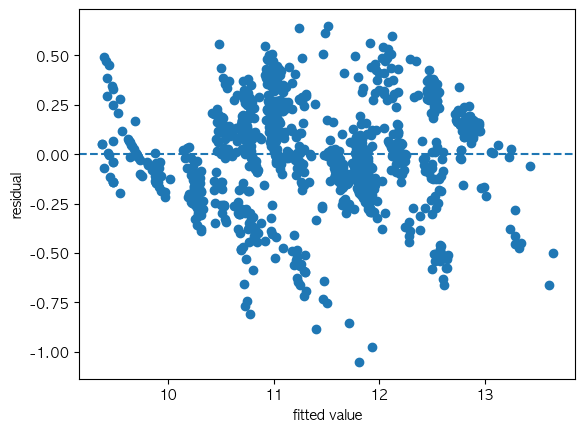

In [74]:
# 등분산성이 스케일링 하기 전과 비교했을 때 더욱 고르게 분포된 것을 확인, 다만 비슷한 추세는 여전히 남아있음

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

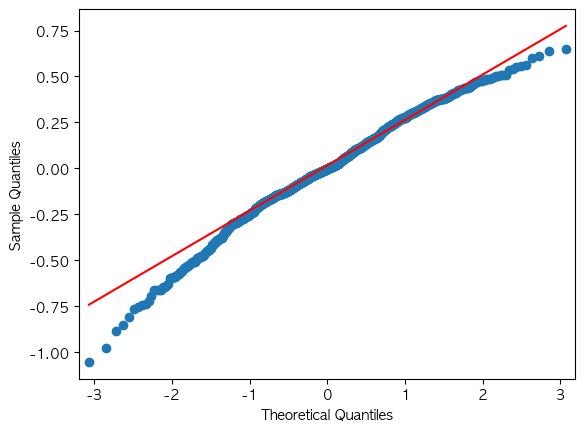

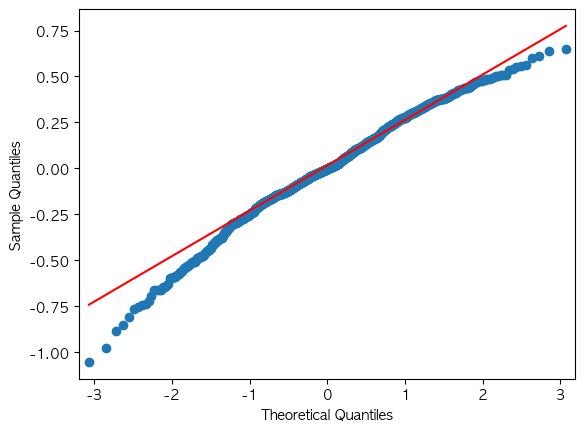

In [61]:
# 정규분포를 확인하는 직선 또한 아까보다 더욱 직선을 따라가는 것이 확인됨

qqplot(reg_result.resid, line = 'q')

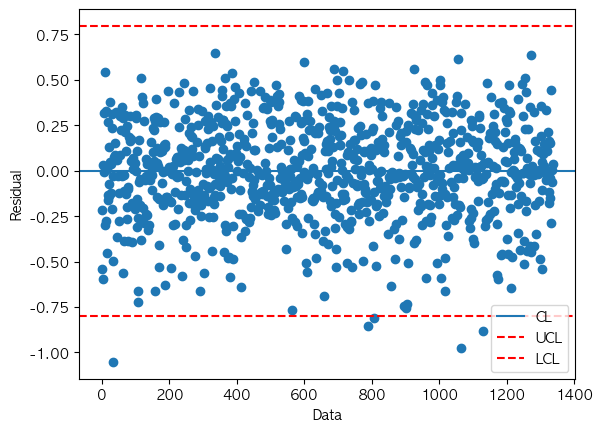

In [62]:
# 범위수를 넘어가는 이상치 또한 줄어든 것을 확인할 수 있으며, 독립성 또한 유지됨

df_train_log.reset_index()
plt.scatter(df_train_log.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

In [64]:
# 모델의 성능 또한 향상된 것을 확인할 수 있음

train_pred = reg_result.predict(df_train_log)
test_pred = reg_result.predict(df_test_log)
print("train data의 결정계수:", r2_score(df_train_log['보험료'], train_pred))
print("test data의 결정계수:", r2_score(df_test_log['보험료'], test_pred))

train data의 결정계수: 0.9154904937342904
test data의 결정계수: 0.9038542204065941


In [77]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
df_view = pd.DataFrame({
    'True' : df_test_log['보험료'].head(10).round(3), 
    'Predict' : test_pred[:10].round(3) })
df_view['diff'] = (df_view['True'] - df_view['Predict']).round(3)
df_view

,True,Predict,diff
834,10.893,10.814,0.079
1106,11.406,10.975,0.431
396,11.353,11.009,0.344
464,9.700,9.658,0.042
1179,12.173,12.258,-0.085
1264,11.549,11.247,0.302
201,11.393,10.992,0.401
722,11.774,11.932,-0.158
744,11.388,11.600,-0.212
308,11.691,11.912,-0.221


#### 결론
- y의 정규화를 통해 모델의 성능 향상 및 정규성, 등분산성 검정에서도 향상되는 모습을 볼 수 있었음
- 회귀분석을 통해 설명변수와 목표변수 사이의 패턴을 모델이 읽어내서 학습할 수 있음을 경험함